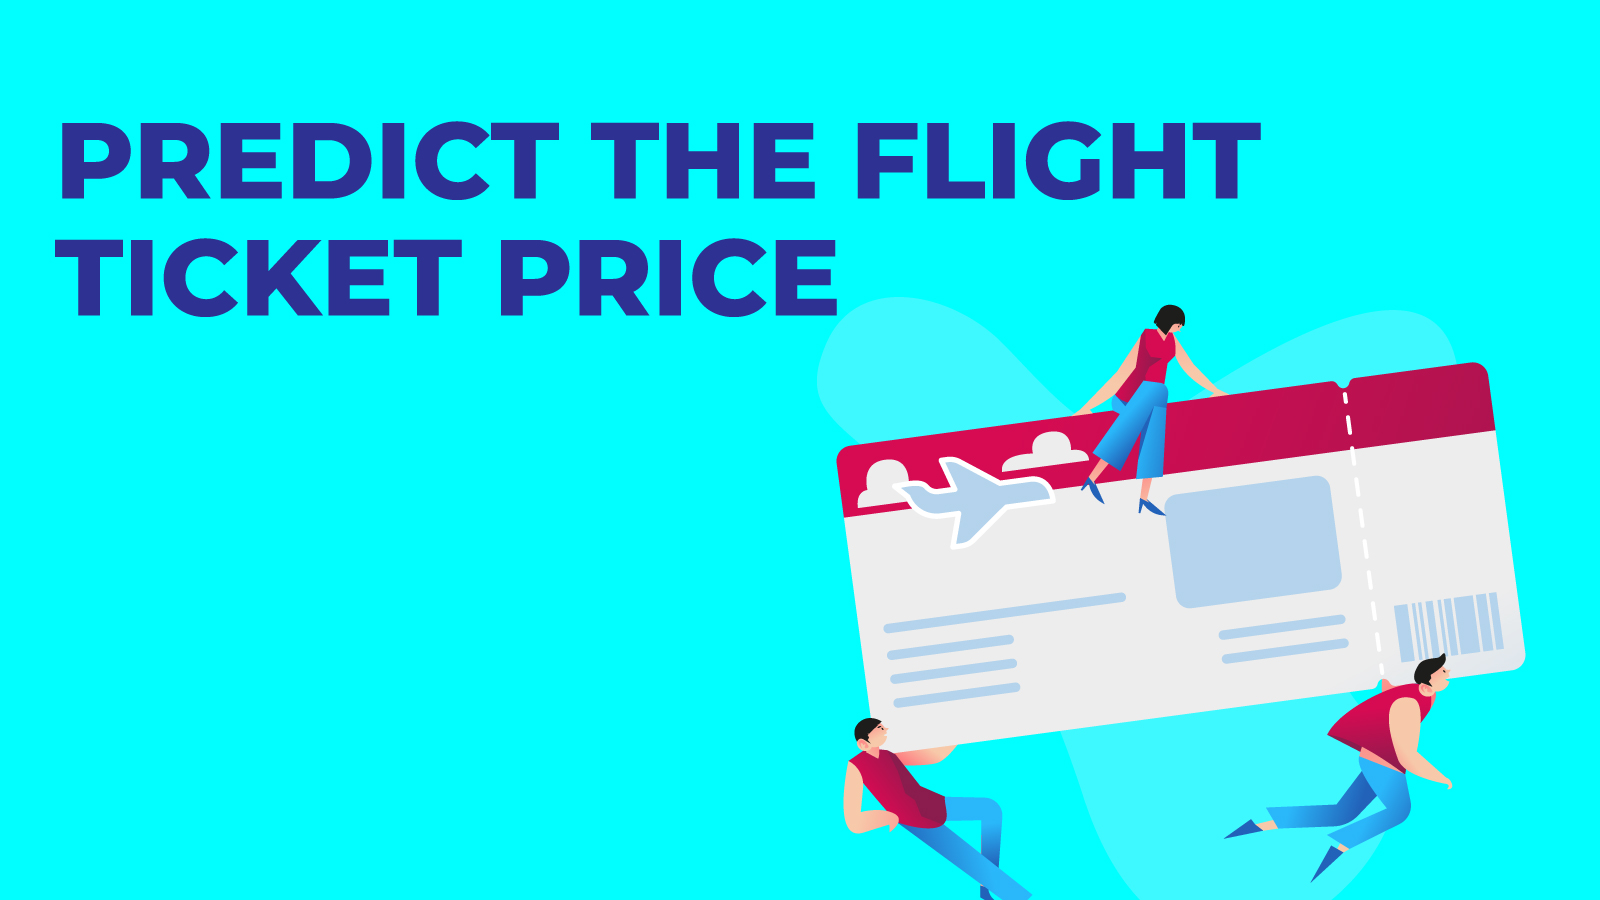



*   Problem Statement : Predict prices of Ticket Flight
*   Details Dataset   : Prices of flight tickets for various airlines March - June of 2019 and between various cities.
*   Dataset Size      : Size of training set: 10683 records Size of test set: 2671 records
*   Features          :


1.   Airline: The name of the airline. 
2.   Date_of_Journey: The date of the journey 
3.   Source: The source from which the service begins. 








## Import Library & Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dabl import plot

In [3]:
train = pd.read_excel("https://github.com/lulusAk/Flight_Tickets_Price_Predictions/raw/main/Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test = pd.read_excel("https://github.com/lulusAk/Flight_Tickets_Price_Predictions/raw/main/Test_set.xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Exploratory data Analysis

Target looks like classification


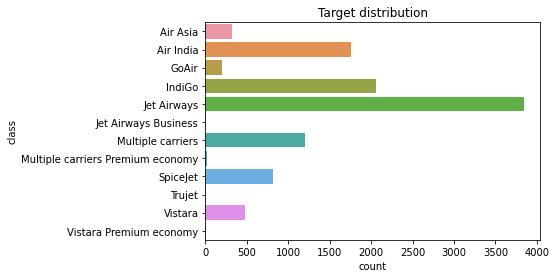

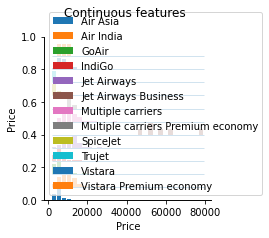

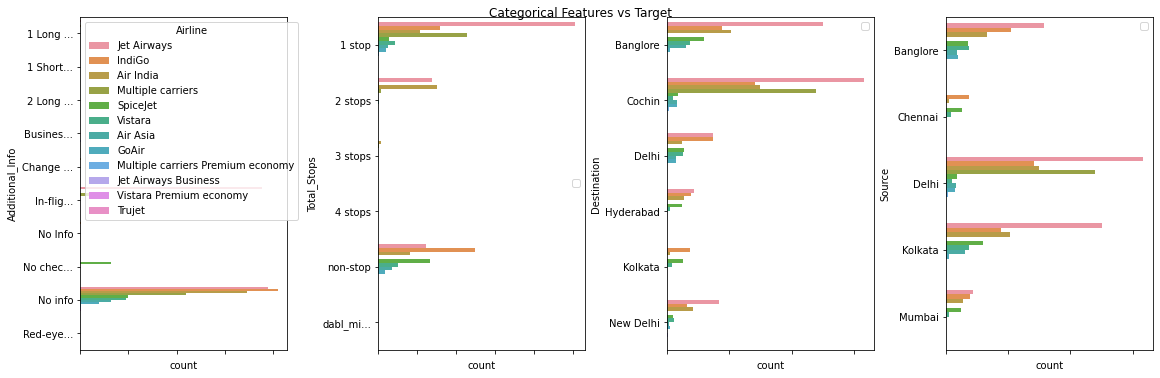

In [5]:
plot(train,'Airline')
plt.show()

Target looks like regression


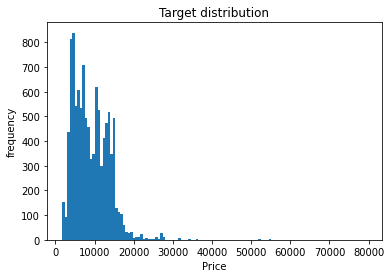

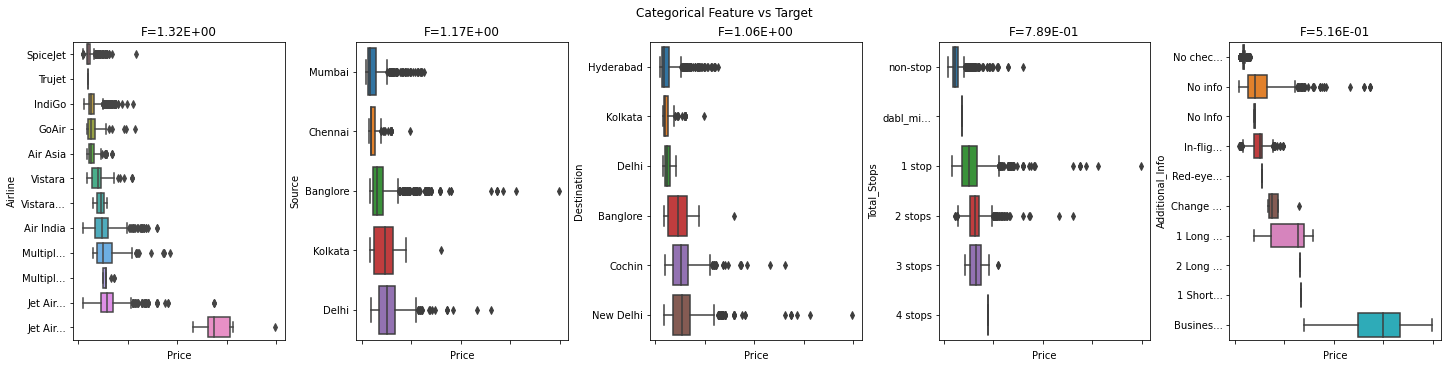

In [6]:
plot(train,'Price')
plt.show()

Target looks like classification


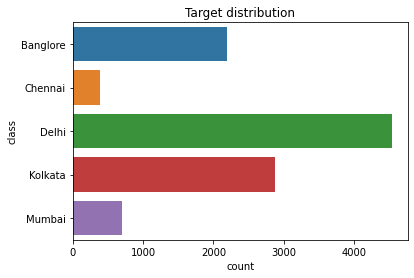

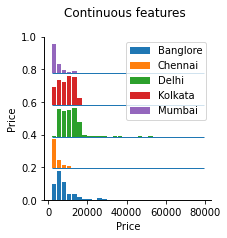

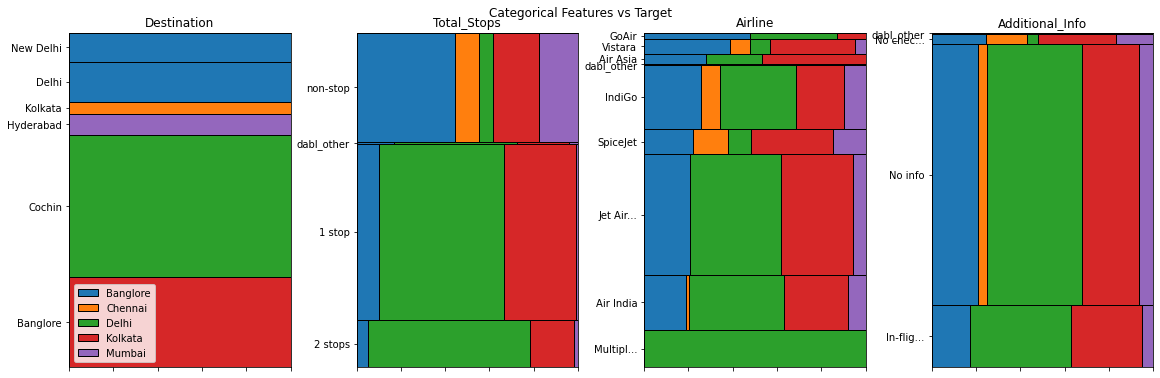

In [7]:
plot(train,'Source')
plt.show()

Target looks like classification


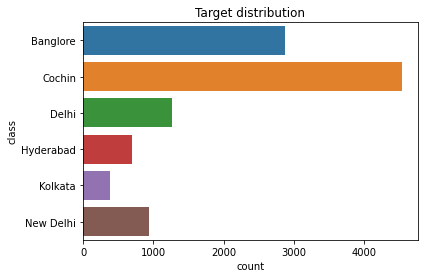

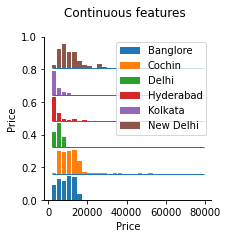

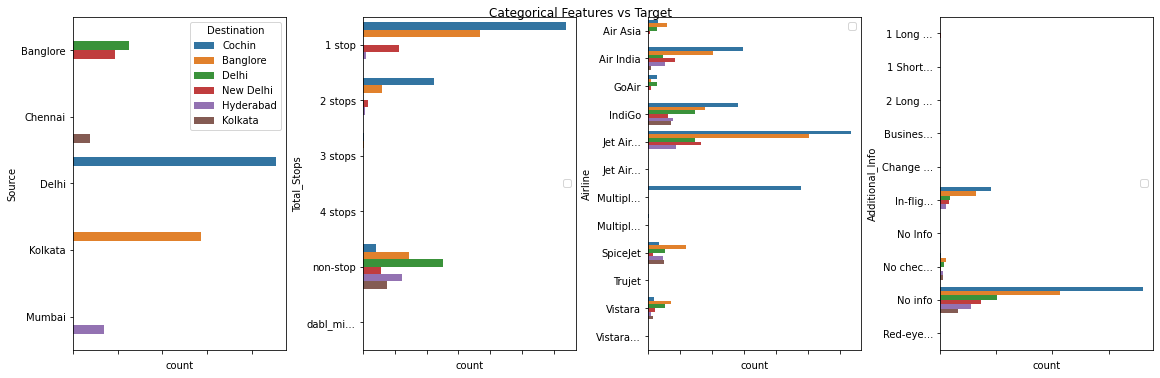

In [8]:
plot(train,'Destination')
plt.show()

## Data Cleaning

### Train Data

In [9]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
# Deleted column Date_of_Journey from train
train.drop(['Date_of_Journey'], axis=1, inplace=True)

# Deleted column Duration from train
train.drop(['Duration'], axis=1, inplace=True)

# Deleted column Arrival_Time from train
train.drop(['Arrival_Time'], axis=1, inplace=True)

# Changed Price from int64 to float
train['Price'] = train['Price'].astype('float')
train.head()


,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302.0


In [11]:
train[['Stops','add']] = train['Total_Stops'].str.split(" ",expand=True)
train = train.drop(columns= ['add'])
train['Stops'] = train['Stops'].str.replace("non-stop","0")
train = train.drop(columns= ['Total_Stops'])
train.head()

,Airline,Source,Destination,Route,Dep_Time,Additional_Info,Price,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,No info,3897.0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,No info,7662.0,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,No info,13882.0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,No info,6218.0,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,No info,13302.0,1


### Test data

In [12]:
# Changed Date_of_Journey from object to datetime
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], format='%m/%d/%Y', errors='coerce')

# Deleted column Date_of_Journey from test
test.drop(['Date_of_Journey'], axis=1, inplace=True)

# Deleted column Duration from test
test.drop(['Duration'], axis=1, inplace=True)

# Deleted column Arrival_Time from test
test.drop(['Arrival_Time'], axis=1, inplace=True)
test.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,non-stop,No info


In [13]:
test[['Stops','add']] = test['Total_Stops'].str.split(" ",expand=True)
test = test.drop(columns= ['add'])
test['Stops'] = test['Stops'].str.replace("non-stop","0")
test = test.drop(columns= ['Total_Stops'])
test.head()

,Airline,Source,Destination,Route,Dep_Time,Additional_Info,Stops
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,No info,1
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,No info,1
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,In-flight meal not included,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,No info,1
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,No info,0


## Train Model

In [14]:
import h2o
from h2o.automl import H2OAutoML


# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.321-b07, mixed mode)
  Starting server from C:\Users\Lulus\pyproj\397_h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Lulus\AppData\Local\Temp\tmp86io5vb4
  JVM stdout: C:\Users\Lulus\AppData\Local\Temp\tmp86io5vb4\h2o_Lulus_started_from_python.out
  JVM stderr: C:\Users\Lulus\AppData\Local\Temp\tmp86io5vb4\h2o_Lulus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_Lulus_u68v5f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.637 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [15]:
# Import a sample binary outcome train/test set into H2O
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
# Identify predictors and response
x = train.columns
y = "Price"
x.remove(y)

In [27]:
aml = H2OAutoML(max_models = 20, max_runtime_secs = 1200, seed = 1)
aml.train(x=x, y=y, training_frame=train)
          

AutoML progress: |
22:31:16.665: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_6_20220421_223116


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,55.0,55.0,81823.0,6.0,6.0,6.0,34.0,62.0,50.745453




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3912926.2108833184
RMSE: 1978.1117791680324
MAE: 1156.1505929442878
RMSLE: 0.18701727481662547
Mean Residual Deviance: 3912926.2108833184

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4871236.176687277
RMSE: 2207.087713863515
MAE: 1272.5495655833583
RMSLE: 0.20485847333479618
Mean Residual Deviance: 4871236.176687277

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.268342e+03,40.117855,1.256642e+03,1.325050e+03,1.285666e+03,1.257696e+03,1.216655e+03
1,mean_residual_deviance,4.883898e+06,382998.400000,4.249984e+06,5.071696e+06,4.832860e+06,5.240757e+06,5.024194e+06
2,mse,4.883898e+06,382998.400000,4.249984e+06,5.071696e+06,4.832860e+06,5.240757e+06,5.024194e+06
3,r2,7.699978e-01,0.018384,7.883823e-01,7.588968e-01,7.748032e-01,7.440221e-01,7.838846e-01
4,residual_deviance,4.883898e+06,382998.400000,4.249984e+06,5.071696e+06,4.832860e+06,5.240757e+06,5.024194e+06
5,rmse,2.208542e+03,88.323190,2.061549e+03,2.252043e+03,2.198377e+03,2.289270e+03,2.241471e+03
6,rmsle,2.045316e-01,0.006446,1.969905e-01,2.120863e-01,2.092535e-01,2.052278e-01,1.991001e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-21 22:31:33,0.959 sec,0.0,4611.143335,3655.640121,2.126264e+07
1,,2022-04-21 22:31:33,0.980 sec,5.0,3427.138237,2582.507147,1.174528e+07
2,,2022-04-21 22:31:33,0.998 sec,10.0,2706.651405,1940.516949,7.325962e+06
3,,2022-04-21 22:31:33,1.016 sec,15.0,2337.892299,1585.586674,5.465740e+06
4,,2022-04-21 22:31:33,1.035 sec,20.0,2164.300067,1396.305264,4.684195e+06
5,,2022-04-21 22:31:33,1.051 sec,25.0,2075.657478,1295.173042,4.308354e+06
6,,2022-04-21 22:31:33,1.066 sec,30.0,2028.479176,1234.092907,4.114728e+06
7,,2022-04-21 22:31:33,1.082 sec,35.0,2004.091953,1198.176563,4.016385e+06
8,,2022-04-21 22:31:33,1.095 sec,40.0,1994.037746,1180.231147,3.976187e+06
9,,2022-04-21 22:31:33,1.109 sec,45.0,1987.698962,1168.572605,3.950947e+06



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Route,4.152729e+11,1.000000,0.459371
1,Airline,1.657432e+11,0.399119,0.183344
2,Dep_Time,1.343323e+11,0.323480,0.148597
3,Stops,1.156043e+11,0.278382,0.127880
4,Additional_Info,5.457762e+10,0.131426,0.060373
5,Destination,1.596691e+10,0.038449,0.017662
6,Source,2.505454e+09,0.006033,0.002772


In [ ]:
grid_search = H2OGridSearch(<model_type), hyper_params=hyper_parameters)

In [28]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_5_AutoML_6_20220421_223116,2207.09,4.87124e+06,1272.55,0.204858,4.87124e+06
DeepLearning_grid_1_AutoML_6_20220421_223116_model_2,2209.8,4.88323e+06,1311.07,0.210616,4.88323e+06
DeepLearning_grid_1_AutoML_6_20220421_223116_model_1,2214.51,4.90404e+06,1286.17,0.208792,4.90404e+06
GBM_grid_1_AutoML_6_20220421_223116_model_2,2219.68,4.92699e+06,1285.35,0.205987,4.92699e+06
DeepLearning_grid_2_AutoML_6_20220421_223116_model_1,2223.54,4.94412e+06,1345.42,0.214779,4.94412e+06
GBM_4_AutoML_6_20220421_223116,2234.74,4.99408e+06,1266.8,0.205536,4.99408e+06
GBM_3_AutoML_6_20220421_223116,2239.41,5.01496e+06,1271.98,0.205956,5.01496e+06
GBM_2_AutoML_6_20220421_223116,2248.64,5.05636e+06,1273.53,0.206151,5.05636e+06
DRF_1_AutoML_6_20220421_223116,2249.58,5.06062e+06,1295.93,0.20736,5.06062e+06
GBM_grid_1_AutoML_6_20220421_223116_model_5,2258.58,5.10117e+06,1274.21,0.207723,5.10117e+06


## The Best Model

In [29]:
# The leader model is stored here
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_6_20220421_223116


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,55.0,55.0,81823.0,6.0,6.0,6.0,34.0,62.0,50.745453




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3912926.2108833184
RMSE: 1978.1117791680324
MAE: 1156.1505929442878
RMSLE: 0.18701727481662547
Mean Residual Deviance: 3912926.2108833184

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4871236.176687277
RMSE: 2207.087713863515
MAE: 1272.5495655833583
RMSLE: 0.20485847333479618
Mean Residual Deviance: 4871236.176687277

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.268342e+03,40.117855,1.256642e+03,1.325050e+03,1.285666e+03,1.257696e+03,1.216655e+03
1,mean_residual_deviance,4.883898e+06,382998.400000,4.249984e+06,5.071696e+06,4.832860e+06,5.240757e+06,5.024194e+06
2,mse,4.883898e+06,382998.400000,4.249984e+06,5.071696e+06,4.832860e+06,5.240757e+06,5.024194e+06
3,r2,7.699978e-01,0.018384,7.883823e-01,7.588968e-01,7.748032e-01,7.440221e-01,7.838846e-01
4,residual_deviance,4.883898e+06,382998.400000,4.249984e+06,5.071696e+06,4.832860e+06,5.240757e+06,5.024194e+06
5,rmse,2.208542e+03,88.323190,2.061549e+03,2.252043e+03,2.198377e+03,2.289270e+03,2.241471e+03
6,rmsle,2.045316e-01,0.006446,1.969905e-01,2.120863e-01,2.092535e-01,2.052278e-01,1.991001e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-21 22:31:33,0.959 sec,0.0,4611.143335,3655.640121,2.126264e+07
1,,2022-04-21 22:31:33,0.980 sec,5.0,3427.138237,2582.507147,1.174528e+07
2,,2022-04-21 22:31:33,0.998 sec,10.0,2706.651405,1940.516949,7.325962e+06
3,,2022-04-21 22:31:33,1.016 sec,15.0,2337.892299,1585.586674,5.465740e+06
4,,2022-04-21 22:31:33,1.035 sec,20.0,2164.300067,1396.305264,4.684195e+06
5,,2022-04-21 22:31:33,1.051 sec,25.0,2075.657478,1295.173042,4.308354e+06
6,,2022-04-21 22:31:33,1.066 sec,30.0,2028.479176,1234.092907,4.114728e+06
7,,2022-04-21 22:31:33,1.082 sec,35.0,2004.091953,1198.176563,4.016385e+06
8,,2022-04-21 22:31:33,1.095 sec,40.0,1994.037746,1180.231147,3.976187e+06
9,,2022-04-21 22:31:33,1.109 sec,45.0,1987.698962,1168.572605,3.950947e+06



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Route,4.152729e+11,1.000000,0.459371
1,Airline,1.657432e+11,0.399119,0.183344
2,Dep_Time,1.343323e+11,0.323480,0.148597
3,Stops,1.156043e+11,0.278382,0.127880
4,Additional_Info,5.457762e+10,0.131426,0.060373
5,Destination,1.596691e+10,0.038449,0.017662
6,Source,2.505454e+09,0.006033,0.002772


## Make Prediction

In [30]:
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [31]:
preds.columns=['Price'] 

In [32]:
preds.head()

Price
14493.2
4442.4
10929.6
12404
4526.67
10701.3
10138.5
4921.43
4494.37
13930


## Create Submission


In [33]:
submission = preds.as_data_frame(use_pandas=True)

In [34]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2671 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


In [39]:
submission.to_csv("F:\Hackathon\MachineHack\Flight_Ticket_Participant_Datasets\Submission_2.csv", index = False)

In [41]:
!python --version

Python 3.9.7


In [42]:
pip list

Package            Version
------------------ ---------
asttokens          2.0.5
backcall           0.2.0
certifi            2021.10.8
charset-normalizer 2.0.12
colorama           0.4.4
cycler             0.11.0
dabl               0.2.2
debugpy            1.6.0
decorator          5.1.1
entrypoints        0.4
et-xmlfile         1.1.0
executing          0.8.3
fonttools          4.32.0
future             0.18.2
h2o                3.36.1.1
idna               3.3
ipykernel          6.13.0
ipython            8.2.0
jedi               0.18.1
joblib             1.1.0
jupyter-client     7.2.2
jupyter-core       4.10.0
kiwisolver         1.4.2
matplotlib         3.5.1
matplotlib-inline  0.1.3
nest-asyncio       1.5.5
numpy              1.22.3
openpyxl           3.0.9
packaging          21.3
pandas             1.4.2
parso              0.8.3
pickleshare        0.7.5
Pillow             9.1.0
pip                22.0.4
prompt-toolkit     3.0.29
psutil             5.9.0
pure-eval          0.2.2
Pygment